In [4]:
import pandas as pd
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("outschool_category_top100_210205csv.csv")
df.head()

,Unnamed: 0,category,title,review_num,price($),price_text,age,age_low,age_high
0,1,Arts,How To Make Awesome Animated Movies (Intro to ...,204.0,40,$40/class,10-15,10,15
1,2,Arts,Flexible Schedule: Smartest Artists: Art Class...,143.0,7,$7/week,4-9,4,9
2,3,Arts,Cake Decorating: Beautiful Buttercream Flex,113.0,20,$20/week,10-15,10,15
3,4,Arts,Intro to Architecture Camp: Designing Modern A...,201.0,15,$15/class,9-13,9,13
4,5,Arts,Minecraft + Architecture History = AWESOME! (F...,292.0,12,$12/week,9-14,9,14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   category    1000 non-null   object 
 2   title       1000 non-null   object 
 3   review_num  959 non-null    float64
 4   price($)    1000 non-null   int64  
 5   price_text  1000 non-null   object 
 6   age         1000 non-null   object 
 7   age_low     1000 non-null   int64  
 8   age_high    1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [9]:
df.shape

(1000, 9)

## 대상 연령에 대한 분석

#### 아웃스쿨 정책
 - 5살을 넘기지 말 것. 아이들이 불편해 함
 - Outschool's policy is that class age ranges not exceed 5 years. We find that students are uncomfortable taking classes with kids who are much younger/older than them, so this promotes a more productive teaching environment.
 - 최대한 많은 아이들이 들어올 수 있게 4~5살로 하는 듯.

In [10]:
df['age_gap'] = df['age_high'] - df['age_low']
df.head()

,Unnamed: 0,category,title,review_num,price($),price_text,age,age_low,age_high,age_gap
0,1,Arts,How To Make Awesome Animated Movies (Intro to ...,204.0,40,$40/class,10-15,10,15,5
1,2,Arts,Flexible Schedule: Smartest Artists: Art Class...,143.0,7,$7/week,4-9,4,9,5
2,3,Arts,Cake Decorating: Beautiful Buttercream Flex,113.0,20,$20/week,10-15,10,15,5
3,4,Arts,Intro to Architecture Camp: Designing Modern A...,201.0,15,$15/class,9-13,9,13,4
4,5,Arts,Minecraft + Architecture History = AWESOME! (F...,292.0,12,$12/week,9-14,9,14,5


In [16]:
pd.crosstab(df['category'], df['age_gap'], margins=True)

age_gap,1,2,3,4,5,6,8,All
category,,,,,,,,
Arts,0,2,9,25,63,1,0,100
Coding & Tech,0,1,11,30,58,0,0,100
English,2,12,18,25,42,0,1,100
Health & Wellness,0,9,12,27,52,0,0,100
Life Skills,1,4,10,20,64,1,0,100
Math,6,16,26,25,27,0,0,100
Music,0,9,12,21,58,0,0,100
Science & Nature,0,3,13,33,51,0,0,100
Social Studies,2,8,14,31,45,0,0,100


### 갭이 1~2살인 수업은? >> 수학/영어. 대상 학년을 제목에 명기함.
 - 두뇌의 발달단계와 이해할 수 있는 수준이 비례하는 수업인 듯. 

In [25]:
# 나이 갭이 1,2,3세인 수업
df[df['age_gap'].isin([1,2,3])]['category'].value_counts()

Math                 48
English              32
Social Studies       24
Music                21
Health & Wellness    21
World Languages      20
Science & Nature     16
Life Skills          15
Coding & Tech        12
Arts                 11
Name: category, dtype: int64

In [29]:
# 나이 갭이 5세인 수업
df[df['age_gap'].isin([5])]['category'].value_counts()

Life Skills          64
Arts                 63
Music                58
Coding & Tech        58
Health & Wellness    52
Science & Nature     51
Social Studies       45
World Languages      45
English              42
Math                 27
Name: category, dtype: int64

In [30]:
# 나이 갭이 4세인 수업
df[df['age_gap'].isin([4])]['category'].value_counts()

World Languages      34
Science & Nature     33
Social Studies       31
Coding & Tech        30
Health & Wellness    27
Math                 25
Arts                 25
English              25
Music                21
Life Skills          20
Name: category, dtype: int64

In [17]:
df[df['age_gap'] == 1]

,Unnamed: 0,category,title,review_num,price($),price_text,age,age_low,age_high,age_gap
223,24,English,Ready- Set- Read! Fun Reading Practice to Shar...,31.0,17,$17/class,7-8,7,8,1
272,73,English,Improving Reading Comprehension!,44.0,13,$13/class,6-7,6,7,1
448,49,Life Skills,Seasons Morning Circle - Waldorf Inspired Vers...,11.0,5,$5/class,4-5,4,5,1
500,1,Math,Beginning Multiplication Facts Made Easy!,171.0,19,$19/class,8-9,8,9,1
560,61,Math,First Semester Grade 2 Math - Second Grade Roc...,1.0,9,$9/class,7-8,7,8,1
573,74,Math,First Semester Grade 1 Math - First Grade Are ...,3.0,9,$9/class,6-7,6,7,1
578,79,Math,"Telling Time, What Does the Clock Say? Part 1",106.0,10,$10/class,6-7,6,7,1
580,81,Math,First Semester Grade 3 Math- Math Is Fun (Part 1),NaN,9,$9/class,8-9,8,9,1
592,93,Math,Second Semester Grade 1 Math - First Grade Are...,NaN,9,$9/class,6-7,6,7,1
844,45,Social Studies,Weekly Journal Writing for 6 and 7 Year Olds,3.0,10,$10/class,6-7,6,7,1


In [22]:
df[df['age_gap'] == 2].sort_values("category").head(50)

,Unnamed: 0,category,title,review_num,price($),price_text,age,age_low,age_high,age_gap
17,18,Arts,Musical Theatre - Triple Threat (Middle School),33.0,28,$28/class,12-14,12,14,2
88,89,Arts,Bitty Ballet: Fundamentals of Ballet for Ages 3-5,28.0,14,$14/class,3-5,3,5,2
130,31,Coding & Tech,AI Machine Learning With Scratch Coding for Kids,46.0,26,$26/class,9-11,9,11,2
296,97,English,The Pen is Mightier Than the Sword: Learning t...,66.0,12,$12/class,6-8,6,8,2
295,96,English,Creative Writing for Young Children Part 1,101.0,6,$6/class,6-8,6,8,2
294,95,English,Kinder Superheroes Class,44.0,12,$12/class,4-6,4,6,2
288,89,English,Preschool Construction Vehicle Unit,75.0,6,$6/class,3-5,3,5,2
281,82,English,Paragraph Writing Using the 4 Square Method Pa...,10.0,19,$19/class,7-9,7,9,2
271,72,English,Let’s Get Ready for Kindergarten: Welcome to M...,24.0,11,$11/class,4-6,4,6,2
256,57,English,1st Grade: Back to Basic Reading Passages and ...,17.0,21,$21/class,5-7,5,7,2


In [19]:
df[df['age_gap'] == 2]['category'].value_counts()

Math                 16
English              12
Music                 9
Health & Wellness     9
Social Studies        8
World Languages       4
Life Skills           4
Science & Nature      3
Arts                  2
Coding & Tech         1
Name: category, dtype: int64

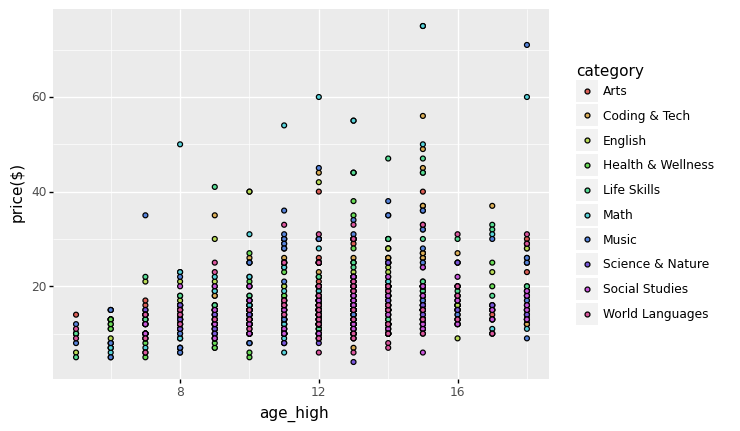

<ggplot: (194258409807)>

In [33]:
fig = plt.Figure()

#df["year"] = df["year"].astype(str)

(ggplot(df, aes(x="age_high", y="price($)", fill="category"))
     + geom_point()
     )